# Electric Vehicle Data Analysis Project

In [ ]:
# First import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [ ]:
# Load dataset

EV = pd.read_csv("/content/Electric_Vehicle.csv")

In [ ]:
# To check all the columns in the data set
EV.columns

Index(['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]',
       'Engine power [KM]', 'Maximum torque [Nm]', 'Type of brakes',
       'Drive type', 'Battery capacity [kWh]', 'Range (WLTP) [km]',
       'Wheelbase [cm]', 'Length [cm]', 'Width [cm]', 'Height [cm]',
       'Minimal empty weight [kg]', 'Permissable gross weight [kg]',
       'Maximum load capacity [kg]', 'Number of seats', 'Number of doors',
       'Tire size [in]', 'Maximum speed [kph]', 'Boot capacity (VDA) [l]',
       'Acceleration 0-100 kph [s]', 'Maximum DC charging power [kW]',
       'mean - Energy consumption [kWh/100 km]'],
      dtype='object')

In [ ]:
# Filling the empty values with 'zero'
mean_energy = ['mean - Energy consumption [kWh/100 km]']
EV[mean_energy] = EV[mean_energy].fillna(0)

In [ ]:
# Seeing the first five rows of the dataset
EV.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


# TASK 1

In [ ]:
# Task 1: A customer has a budget of 350,000 PLN and
# wants an EV with a minimum range of 400 km.
# a) Your task is to filter out EVs that meet these criteria.(2 Marks)
# b) Group them by the manufacturer (Make).(6 marks)
# c) Calculate the average battery capacity for each manufacturer. (8 Marks)

In [ ]:
# a) Your task is to filter out EVs that meet these criteria.(2 Marks)

filtered_EV = EV[(EV['Minimal price (gross) [PLN]'] <= 350000) &
                 (EV['Range (WLTP) [km]'] >= 400)]
filtered_EV.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


In [ ]:
# b) Group them by the manufacturer (Make).(6 marks)

group_make = filtered_EV.groupby("Make")
group_make.size()

,0
Make,
Audi,1
BMW,1
Hyundai,1
Kia,2
Mercedes-Benz,1
Tesla,3
Volkswagen,3


In [ ]:
# c) Calculate the average battery capacity for each manufacturer. (8 Marks)

avg_battery_capacity = group_make["Battery capacity [kWh]"].mean()
avg_battery_capacity.sort_values(ascending= False)

,Battery capacity [kWh]
Make,
Audi,95.000000
BMW,80.000000
Mercedes-Benz,80.000000
Volkswagen,70.666667
Tesla,68.000000
Hyundai,64.000000
Kia,64.000000


# TASK 2

In [ ]:
# Task 2: You suspect some EVs have unusually high or low energy consumption.
# Find the outliers in the mean - Energy consumption [kWh/100 km] column.(16 Marks)

In [ ]:
# first get the column
energy = EV['mean - Energy consumption [kWh/100 km]']

# finding Q1, Q3, IQR
Q1 = energy.quantile(0.25)
Q3 = energy.quantile(0.75)
IQR = Q3 - Q1

# Defining outliers bound
LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR

# Filtering of outliers from datset

answer = EV[(energy < LowerBound) | (energy > UpperBound)]
answer

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
9,Citroën ë-C4,Citroën,ë-C4,125000,136,260,disc (front + rear),2WD (front),50.0,350,...,2000.0,459.0,5,5,16,150,380.0,9.5,100,0.0
29,Peugeot e-2008,Peugeot,e-2008,149400,136,260,disc (front + rear),2WD (front),50.0,320,...,NaN,NaN,5,5,16,150,434.0,NaN,100,0.0
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,0.0
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,0.0
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,0.0
42,Tesla Model S Long Range Plus,Tesla,Model S Long Range Plus,368990,525,755,disc (front + rear),4WD,100.0,652,...,NaN,NaN,5,5,19,250,745.0,3.8,150,0.0
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,NaN,NaN,5,5,21,261,745.0,2.5,150,0.0
44,Tesla Model X Long Range Plus,Tesla,Model X Long Range Plus,407990,525,755,disc (front + rear),4WD,100.0,561,...,NaN,NaN,7,5,20,250,857.0,4.6,150,0.0
45,Tesla Model X Performance,Tesla,Model X Performance,482990,772,1140,disc (front + rear),4WD,100.0,548,...,NaN,NaN,7,5,20,261,857.0,2.8,150,0.0


# TASK 3

In [ ]:
# Task 3: Your manager wants to know if there's a strong relationship
# between battery capacity and range.
# a) Create a suitable plot to visualize.(8 Marks)
# b) Highlight any insights.(8 Marks)

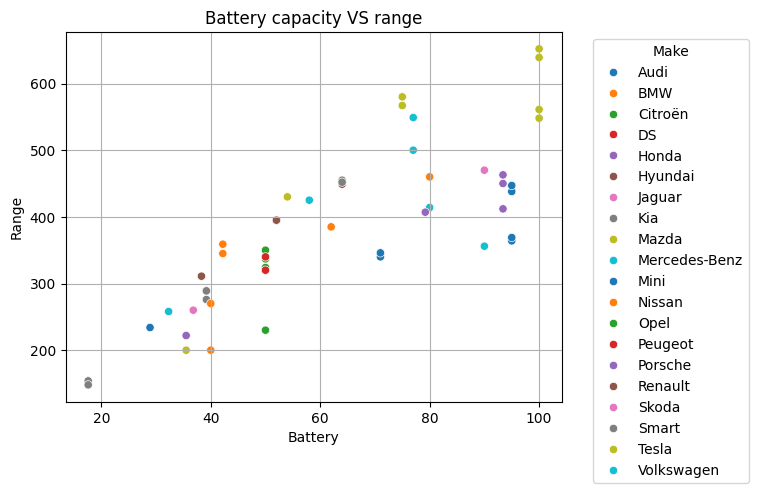

In [ ]:
# a) Create a suitable plot to visualize.(8 Marks)

sns.scatterplot(data = EV,
                x = 'Battery capacity [kWh]',
                y = 'Range (WLTP) [km]',
                hue = 'Make',
                palette='tab10')
plt.title("Battery capacity VS range")
plt.xlabel("Battery")
plt.ylabel("Range")
plt.legend(title='Make', bbox_to_anchor=(1.05, 1),loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# b) Highlight any insights.(8 Marks)

float(EV['Battery capacity [kWh]'].corr(EV['Range (WLTP) [km]']))
# a positive correlation is observed between battery capacity and vehicle range

0.8104385771936846

# TASK 4

In [ ]:
# Task 4: Build an EV recommendation class.
# The class should allow users to input their
# budget, desired range, and battery capacity.
# The class should then return the top three EVs
# matching their criteria. (8+8 Marks)

In [ ]:
class EVRecommend:
  def __init__(self,EV_data):
    self.EV_data = EV_data

  def recommend(self, budget, min_range, minimum_capacity):
    recommendation = self.EV_data[
                    (self.EV_data["Minimal price (gross) [PLN]"] <= budget) &
                    (self.EV_data["Range (WLTP) [km]"] >= min_range) &
                    (self.EV_data["Battery capacity [kWh]"]>= minimum_capacity)]
    sort_reccommends = recommendation.sort_values(
                        by=["Minimal price (gross) [PLN]",
                            "Range (WLTP) [km]",
                            "Battery capacity [kWh]"],
                        ascending=[True,False,False])
    return sort_reccommends[["Car full name",
                             "Make",
                             "Model",
                             "Minimal price (gross) [PLN]",
                             "Range (WLTP) [km]","Battery capacity [kWh]",
                             "mean - Energy consumption [kWh/100 km]",
                             "Maximum speed [kph]"]
                            ].head(3)

Budget = int(input("Enter your Budget: "))
Desired_range = int(input("Enter minimum range of vehicle: "))
Battery_capacity = int(input("Enter minimum capacity of battery: "))
recommender = EVRecommend(EV)
recommender.recommend(Budget, Desired_range, Battery_capacity)


Enter your Budget: 200000
Enter minimum range of vehicle: 250
Enter minimum capacity of battery: 60


,Car full name,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh],mean - Energy consumption [kWh/100 km],Maximum speed [kph]
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,452,64.0,15.7,167
25,Nissan Leaf e+,Nissan,Leaf e+,164000,385,62.0,17.1,157
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,455,64.0,15.9,167


# TASK 5

In [ ]:
# Task 5: Inferential Statistics – Hypothesis Testing:
# Test whether there is a significant
# difference in the average Engine power [KM] of vehicles manufactured
# by two leading manufacturers i.e. Tesla and Audi.
# What insights can you draw from the test results?
# Recommendations and Conclusion:
# Provide actionable insights based on your analysis.
# Conduct a two sample t-test using ttest_ind from scipy.stats module(16 Marks)


In [ ]:
# H0 --> There is no significant difference in average engine power
#        between two leading manufactures "Tesla" and "Audi"

# H1 --> There is a significant difference in average engine power
#        between two leading manufactures "Tesla" and "Audi"

In [ ]:
# storing tesla and audi average engine power

tesla_power = EV[EV['Make'] == "Tesla"]["Engine power [KM]"]
audi_power = EV[EV['Make'] == "Audi"]["Engine power [KM]"]

# mean engine power of tesla and audi
tesla_power_mean = tesla_power.mean()
audi_power_mean = audi_power.mean()

# T-Test
t_stat, p_value = ttest_ind(tesla_power,audi_power,equal_var= False)

print("Tesla mean engine power: {:.2f} [KM]".format(tesla_power_mean))
print("Audi mean engine power: {:.2f} [KM]".format(audi_power_mean))
print("T-statistic: {:.2f}".format(t_stat))
print("P_Value: {:.4f}".format(p_value))


Tesla mean engine power: 533.00 [KM]
Audi mean engine power: 392.00 [KM]
T-statistic: 1.79
P_Value: 0.1068


In [ ]:
# Significance level

alpha = 0.05
if (p_value < alpha):
  print("We reject null hypothesis.There is a significant difference in average engine power between two leading manufactures Tesla and Audi")
else:
  print("We fail to reject null hypothesis. There is no significant difference in average engine power between two leading manufactures Tesla and Audi")

We fail to reject null hypothesis. There is no significant difference in average engine power between two leading manufactures Tesla and Audi


In [ ]:
# INTERPRETATION :

# Although Tesla’s vehicles have a higher average engine power compared to Audi
# the t-test results show a p-value of 0.1068, which is greater than the
# 0.05 significance level.
# This means that the observed difference is not statistically significant
# at the 5% level.

In [ ]:
# CONCLUSION:

# Based on the available data, we do not have enough evidence to claim
# a significant difference in average engine power between Tesla and Audi EVs.
# While Tesla tends to have higher power on average,
# this difference could be due to sample variability.

# TASK 6

In [ ]:
# Task 6: Project Video Explanation (20 Marks)
# Record a brief video explaining your project,
# covering its objectives, methods, and outcomes.
# The evaluation will focus on clarity of
# explanation, communication skills, and demonstration of
# problem understanding.


[Video Submission](https://drive.google.com/file/d/1S2TssfChZhRuddWeaWbuLIHUNXWt02em/view?usp=drive_link)